In [234]:
print("Hello World!")

Hello World!


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.api import VAR
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [2]:
historical_data_punjab=pd.read_csv("C:\Desktop\Smart Irrigation System\Punjab, India\PUNJAB_2_open-meteo-31.39N75.93E285m.csv")

In [3]:
historical_data_punjab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 9 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   time                                35064 non-null  object 
 1   temperature_2m (°C)                 35064 non-null  float64
 2   relative_humidity_2m (%)            35064 non-null  int64  
 3   precipitation (mm)                  35064 non-null  float64
 4   et0_fao_evapotranspiration (mm)     35064 non-null  float64
 5   wind_speed_10m (km/h)               35064 non-null  float64
 6   soil_temperature_28_to_100cm (°C)   35064 non-null  float64
 7   soil_moisture_28_to_100cm (m³/m³)   35064 non-null  float64
 8   shortwave_radiation_instant (W/m²)  35064 non-null  float64
dtypes: float64(7), int64(1), object(1)
memory usage: 2.4+ MB


In [4]:

# Convert timestamp to datetime
historical_data_punjab['timestamp'] = pd.to_datetime(historical_data_punjab['time'])

# Extract date
historical_data_punjab['date'] = historical_data_punjab['timestamp'].dt.date

# Aggregate to daily data
historical_data_punjab_daily = historical_data_punjab.groupby('date').agg({
    'temperature_2m (°C)': 'mean',
    'relative_humidity_2m (%)': 'mean',
    'precipitation (mm)': 'sum',
    'et0_fao_evapotranspiration (mm)': 'sum',
    'wind_speed_10m (km/h)': 'mean',
    'soil_temperature_28_to_100cm (°C)': 'mean',
    'soil_moisture_28_to_100cm (m³/m³)': 'mean',
    'shortwave_radiation_instant (W/m²)': 'sum'
}).reset_index()


In [5]:
future_data_punjab = pd.read_csv(r"C:\Desktop\Smart Irrigation System\future_data_punjab_open-meteo-31.39N75.93E285m.csv")
## from peroid 2024 Jan 1 to 2024 Jun 19

In [6]:
future_data_punjab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4081 entries, 0 to 4080
Data columns (total 9 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   time                                4081 non-null   object 
 1   temperature_2m (°C)                 4081 non-null   float64
 2   relative_humidity_2m (%)            4081 non-null   int64  
 3   precipitation (mm)                  4081 non-null   float64
 4   et0_fao_evapotranspiration (mm)     4081 non-null   float64
 5   wind_speed_10m (km/h)               4081 non-null   float64
 6   soil_temperature_28_to_100cm (°C)   4081 non-null   float64
 7   soil_moisture_28_to_100cm (m³/m³)   4081 non-null   float64
 8   shortwave_radiation_instant (W/m²)  4081 non-null   float64
dtypes: float64(7), int64(1), object(1)
memory usage: 287.1+ KB


In [7]:

# Convert timestamp to datetime
future_data_punjab['timestamp'] = pd.to_datetime(future_data_punjab['time'])

# Extract date
future_data_punjab['date'] = future_data_punjab['timestamp'].dt.date

# Aggregate to daily data
future_data_punjab_daily = future_data_punjab.groupby('date').agg({
    'temperature_2m (°C)': 'mean',
    'relative_humidity_2m (%)': 'mean',
    'precipitation (mm)': 'sum',
    'et0_fao_evapotranspiration (mm)': 'sum',
    'wind_speed_10m (km/h)': 'mean',
    'soil_temperature_28_to_100cm (°C)': 'mean',
    'soil_moisture_28_to_100cm (m³/m³)': 'mean',
    'shortwave_radiation_instant (W/m²)': 'sum'
}).reset_index()


In [8]:
future_data_punjab_daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 9 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   date                                171 non-null    object 
 1   temperature_2m (°C)                 171 non-null    float64
 2   relative_humidity_2m (%)            171 non-null    float64
 3   precipitation (mm)                  171 non-null    float64
 4   et0_fao_evapotranspiration (mm)     171 non-null    float64
 5   wind_speed_10m (km/h)               171 non-null    float64
 6   soil_temperature_28_to_100cm (°C)   171 non-null    float64
 7   soil_moisture_28_to_100cm (m³/m³)   171 non-null    float64
 8   shortwave_radiation_instant (W/m²)  171 non-null    float64
dtypes: float64(8), object(1)
memory usage: 12.2+ KB


In [9]:
# Concatenate the DataFrames
combined_historical_data_punjab_daily = pd.concat([historical_data_punjab_daily, future_data_punjab_daily], ignore_index=True)


In [10]:
combined_historical_data_punjab_daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1632 entries, 0 to 1631
Data columns (total 9 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   date                                1632 non-null   object 
 1   temperature_2m (°C)                 1632 non-null   float64
 2   relative_humidity_2m (%)            1632 non-null   float64
 3   precipitation (mm)                  1632 non-null   float64
 4   et0_fao_evapotranspiration (mm)     1632 non-null   float64
 5   wind_speed_10m (km/h)               1632 non-null   float64
 6   soil_temperature_28_to_100cm (°C)   1632 non-null   float64
 7   soil_moisture_28_to_100cm (m³/m³)   1632 non-null   float64
 8   shortwave_radiation_instant (W/m²)  1632 non-null   float64
dtypes: float64(8), object(1)
memory usage: 114.9+ KB


In [11]:
# Rename ET₀ column for easier reference
combined_historical_data_punjab_daily.rename(columns={'et0_fao_evapotranspiration (mm)': 'ET₀ (mm)'}, inplace=True)

In [12]:
 #Set the date column as the index
combined_historical_data_punjab_daily.set_index('date', inplace=True)
# Ensure the index is in datetime format
combined_historical_data_punjab_daily.index = pd.to_datetime(combined_historical_data_punjab_daily.index)



## Examine Historical Soil Moisture Data


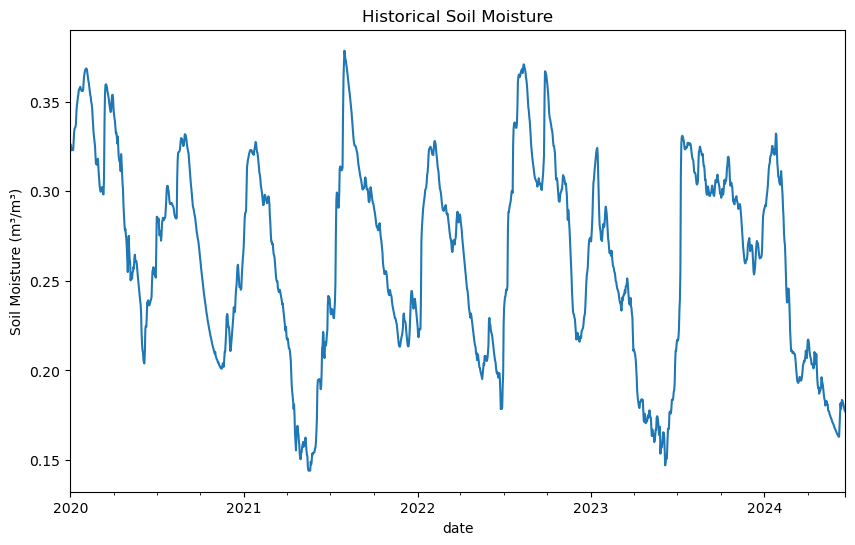

count    1632.000000
mean        0.263451
std         0.055661
min         0.144000
25%         0.218219
50%         0.269792
75%         0.306469
max         0.378458
Name: soil_moisture_28_to_100cm (m³/m³), dtype: float64

In [13]:
# Plot historical soil moisture data
combined_historical_data_punjab_daily['soil_moisture_28_to_100cm (m³/m³)'].plot(figsize=(10, 6), title='Historical Soil Moisture')
plt.ylabel('Soil Moisture (m³/m³)')
plt.show()

# Describe the soil moisture data
combined_historical_data_punjab_daily['soil_moisture_28_to_100cm (m³/m³)'].describe()



In [ ]:

# Drop any rows with missing values
combined_historical_data_punjab_daily.dropna(inplace=True)


In [15]:
combined_historical_data_punjab_daily_save=combined_historical_data_punjab_daily.copy()

In [17]:
 
combined_historical_data_punjab_daily.columns

Index(['temperature_2m (°C)', 'relative_humidity_2m (%)', 'precipitation (mm)',
       'ET₀ (mm)', 'wind_speed_10m (km/h)',
       'soil_temperature_28_to_100cm (°C)',
       'soil_moisture_28_to_100cm (m³/m³)',
       'shortwave_radiation_instant (W/m²)'],
      dtype='object')

## Check Stationarity and Differencing


In [18]:
from statsmodels.tsa.stattools import adfuller

def check_stationarity(timeseries):
    result = adfuller(timeseries.dropna())
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    if result[1] < 0.05:
        print("The series is stationary")
    else:
        print("The series is not stationary, differencing needed")

# Check for each column in the dataset
for column in combined_historical_data_punjab_daily.columns:
    print(f'Checking stationarity for {column}')
    check_stationarity(combined_historical_data_punjab_daily[column])

# Apply differencing if needed
combined_historical_data_punjab_daily_diff = combined_historical_data_punjab_daily.diff().dropna()

# Re-check stationarity after differencing
for column in combined_historical_data_punjab_daily_diff.columns:
    print(f'Checking stationarity for differenced {column}')
    check_stationarity(combined_historical_data_punjab_daily_diff[column])



Checking stationarity for temperature_2m (°C)
ADF Statistic: -2.3314193406063763
p-value: 0.16203471430990163
The series is not stationary, differencing needed
Checking stationarity for relative_humidity_2m (%)
ADF Statistic: -3.2854185118543158
p-value: 0.015542982892423668
The series is stationary
Checking stationarity for precipitation (mm)
ADF Statistic: -19.312402740163133
p-value: 0.0
The series is stationary
Checking stationarity for ET₀ (mm)
ADF Statistic: -2.812728027026543
p-value: 0.056478535122930426
The series is not stationary, differencing needed
Checking stationarity for wind_speed_10m (km/h)
ADF Statistic: -4.437334127371383
p-value: 0.00025478769229093587
The series is stationary
Checking stationarity for soil_temperature_28_to_100cm (°C)
ADF Statistic: -4.30755172601242
p-value: 0.0004310249637016844
The series is stationary
Checking stationarity for soil_moisture_28_to_100cm (m³/m³)
ADF Statistic: -4.430771020468634
p-value: 0.00026174426704823135
The series is stat

## Fitting Vector Autoregresion (VAR) Time series Model


In [253]:
""""Using this because it take multiple variables simultaneously"""

'"Using this because it take multiple variables simultaneously'

In [21]:
## Fit the VAR model to the differenced data.
# Fit the VAR model
model = VAR(combined_historical_data_punjab_daily_diff)
model_fit = model.fit(maxlags=15, ic='aic')

# Summary of the model
model_fit.summary()


c:\Users\godwi\Downloads\Anconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 23, Jun, 2024
Time:                     13:24:08
--------------------------------------------------------------------
No. of Equations:         8.00000    BIC:                    2.10760
Nobs:                     1621.00    HQIC:                  0.752309
Log likelihood:          -17714.4    FPE:                   0.954355
AIC:                   -0.0473856    Det(Omega_mle):        0.646097
--------------------------------------------------------------------
Results for equation temperature_2m (°C)
                                            coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------------------------------
const                                          0.017753         0.028905            0.614           0.539
L1.temperature_2m (°C)                         0.063

##  Forecast Future Values

In [22]:

# Forecast the next 16 days
forecast_steps = 16
lag_order = model_fit.k_ar
forecast_diff = model_fit.forecast(y=combined_historical_data_punjab_daily_diff.values[-lag_order:], steps=forecast_steps)

# Create a DataFrame for the forecasted differenced values
forecast_dates = pd.date_range(start=combined_historical_data_punjab_daily.index[-1] + pd.Timedelta(days=1), periods=forecast_steps, freq='D')
forecasted_diff_df = pd.DataFrame(data=forecast_diff, index=forecast_dates, columns=combined_historical_data_punjab_daily_diff.columns)

# Reverse the differencing to get the actual forecasted values
# Get the last value from the original data
last_values = combined_historical_data_punjab_daily.iloc[-1]

# Initialize the DataFrame for the actual forecasted values
forecasted_values_df = forecasted_diff_df.cumsum() + last_values



## Time Series Model Evaluation 

In [24]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import pandas as pd
# Evaluate the forecasted values against the test set
test = combined_historical_data_punjab_daily[-forecast_steps:]  # Take the last 16 days from your actual data for evaluation

# Calculate accuracy metrics
mae = mean_absolute_error(test, forecasted_values_df)
mse = mean_squared_error(test, forecasted_values_df)
rmse = np.sqrt(mse)

# Calculate means
mean_actual = test.mean()
mean_forecasted = forecasted_values_df.mean()

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'Mean Actual: \n{mean_actual}')
print(f'Mean Forecasted: \n{mean_forecasted}')

# Compare RMSE with Mean Actual Values
mean_actual_value = mean_actual.mean()  # Overall mean of actual values
if rmse < mean_actual_value:
    print(f"RMSE ({rmse}) is less than the mean actual value ({mean_actual_value}). The model performs well.")
else:
    print(f"RMSE ({rmse}) is not less than the mean actual value ({mean_actual_value}). The model may not perform well.")


MAE: 210.39541490024214
MSE: 458806.879823116
RMSE: 677.3528473573548
Mean Actual: 
temperature_2m (°C)                     34.629688
relative_humidity_2m (%)                25.651042
precipitation (mm)                       0.018750
ET₀ (mm)                                 7.446250
wind_speed_10m (km/h)                    9.854948
soil_temperature_28_to_100cm (°C)       31.487500
soil_moisture_28_to_100cm (m³/m³)        0.176115
shortwave_radiation_instant (W/m²)    5777.612500
dtype: float64
Mean Forecasted: 
temperature_2m (°C)                     34.844978
relative_humidity_2m (%)                26.361987
precipitation (mm)                       4.316609
ET₀ (mm)                                 6.152750
wind_speed_10m (km/h)                    9.798700
soil_temperature_28_to_100cm (°C)       31.682939
soil_moisture_28_to_100cm (m³/m³)        0.179610
shortwave_radiation_instant (W/m²)    4799.397427
dtype: float64
RMSE (677.3528473573548) is less than the mean actual value (735.859

In [ ]:
forecasted_values_df

In [26]:
# Combine the historical and forecasted data
historical_data_with_forcast_data = pd.concat([combined_historical_data_punjab_daily, forecasted_values_df])

In [27]:
historical_data_with_forcast_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1648 entries, 2020-01-01 to 2024-07-05
Data columns (total 8 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   temperature_2m (°C)                 1648 non-null   float64
 1   relative_humidity_2m (%)            1648 non-null   float64
 2   precipitation (mm)                  1648 non-null   float64
 3   ET₀ (mm)                            1648 non-null   float64
 4   wind_speed_10m (km/h)               1648 non-null   float64
 5   soil_temperature_28_to_100cm (°C)   1648 non-null   float64
 6   soil_moisture_28_to_100cm (m³/m³)   1648 non-null   float64
 7   shortwave_radiation_instant (W/m²)  1648 non-null   float64
dtypes: float64(8)
memory usage: 115.9 KB


In [28]:
 
# Rename ET₀ column for easier reference
future_data_punjab_daily.rename(columns={'et0_fao_evapotranspiration (mm)': 'ET₀ (mm)'}, inplace=True)#Set the date column as the index
future_data_punjab_daily.set_index('date', inplace=True)
# Ensure the index is in datetime format
future_data_punjab_daily.index = pd.to_datetime(future_data_punjab_daily.index)
# Rename ET₀ column for easier reference
future_data_punjab_daily.rename(columns={'et0_fao_evapotranspiration (mm)': 'ET₀ (mm)'}, inplace=True)

In [29]:
# Combine the historical and forecasted data
present_data_with_forecast_data = pd.concat([future_data_punjab_daily, forecasted_values_df])
# Save the combined data to a new CSV file if needed
#present_data_with_forecast_data.to_csv(r"C:\Desktop\Smart Irrigation System\present_data_with_forecast_data.csv")



In [30]:
present_data_with_forecast_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 2024-01-01 to 2024-07-05
Data columns (total 8 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   temperature_2m (°C)                 187 non-null    float64
 1   relative_humidity_2m (%)            187 non-null    float64
 2   precipitation (mm)                  187 non-null    float64
 3   ET₀ (mm)                            187 non-null    float64
 4   wind_speed_10m (km/h)               187 non-null    float64
 5   soil_temperature_28_to_100cm (°C)   187 non-null    float64
 6   soil_moisture_28_to_100cm (m³/m³)   187 non-null    float64
 7   shortwave_radiation_instant (W/m²)  187 non-null    float64
dtypes: float64(8)
memory usage: 13.1 KB


In [ ]:
present_data_with_forecast_data.tail(20)

## Visualizing forecasted Soil moisture with Historical data

In [275]:
import plotly.graph_objects as go

# Create a figure
fig = go.Figure()

# Add the historical soil moisture line
fig.add_trace(go.Scatter(
    x=historical_data_with_forcast_data.index, 
    y=historical_data_with_forcast_data["soil_moisture_28_to_100cm (m³/m³)"],
    mode='lines',
    name='Historical Soil Moisture'
))

# Add the forecasted soil moisture line
fig.add_trace(go.Scatter(
    x=forecasted_values_df.index, 
    y=forecasted_values_df["soil_moisture_28_to_100cm (m³/m³)"],
    mode='lines',
    name='Forecasted Soil Moisture',
    line=dict(dash='dash')  # This creates a dashed line
))

# Update layout for the figure
fig.update_layout(
    title='Soil Moisture Over Time With Prediction',
    xaxis_title='Date',
    yaxis_title='Soil Moisture (m³/m³)',
    legend_title='Legend',
    template='plotly_white',  # Optional: set a template
    width=900,  # Width of the plot
    height=700  # Height of the plot
)

# Show the figure
fig.show()


## Visualizing forecasted Soil moisture

In [278]:
import plotly.graph_objects as go

# Create a figure
fig = go.Figure()

# Add the predicted soil moisture line
fig.add_trace(go.Scatter(
    x=forecasted_values_df.index, 
    y=forecasted_values_df["soil_moisture_28_to_100cm (m³/m³)"],
    mode='lines',
    name='Predicted Soil Moisture',
    line=dict(dash='dash')  # This creates a dashed line
))

# Update layout for the figure
fig.update_layout(
    title='16 days forecasted  Soil Moisture',
    xaxis_title='Date',
    yaxis_title='Forecasted Soil Moisture',
    legend_title='Legend',
    template='plotly_white',  # Optional: set a template
    width=900,  # Width of the plot
    height=700  # Height of the plot
)

# Show the figure
fig.show()
